# FORESEE Tutorial - U(1)B

### Load Libraries 

In [14]:
import sys
src_path = "/Users/jordi/software/FORESEE"
sys.path.append(src_path)

import numpy as np
from src.foresee import Foresee, Utility, Model

from matplotlib import pyplot as plt

## 1. Initialization 


All function that we will need are included in the FORESEE package. We start by simply initializing it: 

In [15]:
foresee = Foresee()

## 2. Specifying the Model: U(1)B

The phenomenology of the B gauge boson $A'$ can be described by the following Lagrangian

\begin{equation}
 \mathcal{L} = \frac{1}{2} m_{A'}^2 A'^2  - g_{B} \sum  x_f \ \bar f \gamma^\mu f A'_\mu
\end{equation}

with the dark photon mass $m_{A'}$ and the coupling $g$ as free parameters. The parameters $x_f$ specify the baryon number of different fermions, in this case $x_u=x_d = 1/3$ and $x_e=x_\nu=0$ for all three generations. For the search for the gauge boson at forward experiments we need to know i) the *production rate*, ii) the *lifetime* and iii) possibly the *decay branching fractions* of dark photons as function of those two parameters. All properties are specified in the `Model` class. We initialize it with the name of the model as argument. 

In [16]:
energy = "13.6"
modelname="U(1)B"
model = Model(modelname, path="./")

In [17]:
model.add_production_2bodydecay(
    pid0 = "111",
    pid1 = "22",
    br = "2*0.99 * (coupling/0.3)**2 * pow(1.-pow(mass/self.masses('111'),2),3)*np.abs((1-mass**2/0.78265**2 - 0.00849/0.78265*1j)**(-1))**2",
    generator = "EPOSLHC",
    energy = energy,
    nsample = 10
)

model.add_production_2bodydecay(
    pid0 = "221",
    pid1 = "22",
    br = "1./16*0.3941 * (coupling/0.3)**2 * pow(1.-pow(mass/self.masses('221'),2),3)*np.abs((1-mass**2/0.78265**2 - 0.00849/0.78265*1j)**(-1)+(1-mass**2/1.019461**2-0.004249/1.019461*1j)**(-1))**2",
    generator = "EPOSLHC",
    energy = energy,
    nsample = 10, 
)

model.add_production_2bodydecay(
    pid0 = "331",
    pid1 = "22",
    br = "1./49.*0.02307 * (coupling/0.3)**2 * pow(1.-pow(mass/self.masses('331'),2),3) * np.abs((1-mass**2/0.78265**2 - 0.00849/0.78265*1j)**(-1) - 2*(1-mass**2/1.019461**2-0.004249/1.019461*1j)**(-1))**2",
    generator = "EPOSLHC",
    energy = energy,
    nsample = 10, 
)

In [18]:
model.add_production_mixing(
    pid = "223",
    mixing = "coupling * 4./17. * 0.78265**2/abs(mass**2-0.78265**2+0.78265*0.00849*1j)",
    generator = "EPOSLHC",
    energy = energy,
)

model.add_production_mixing(
    pid = "333",
    mixing = "coupling /12.88 * 1.019461**2/abs(mass**2-1.019461**2+1.019461*0.004249*1j)",
    generator = "EPOSLHC",
    energy = energy,
)

Particles can also be produced directly in collisions. In the case of dark photons, this proceeds through Bremsstrahlung at lower masses or through Drell-Yan production at higher masses. The spectra for LLPs at some reference coupling need to be provided for a fixed set of masses in the `model/direct` directory. We also provide an option to implement additional conditions in terms of the momentum `p`, in this case the requirement that pT of dark photon produced in Bremssteahlung is smaller than 1 GeV.

In [19]:
masses_brem = [ 
   0.01  ,  0.0126,  0.0158,  0.02  ,  0.0251,  0.0316,  0.0398,
   0.0501,  0.0631,  0.0794,  0.1   ,  0.1122,  0.1259,  0.1413,
   0.1585,  0.1778,  0.1995,  0.2239,  0.2512,  0.2818,  0.3162,
   0.3548,  0.3981,  0.4467,  0.5012,  0.5623,  0.6026,  0.631 ,
   0.6457,  0.6607,  0.6761,  0.6918,  0.7079,  0.7244,  0.7413,
   0.7586,  0.7762,  0.7943,  0.8128,  0.8318,  0.8511,  0.871 ,
   0.8913,  0.912 ,  0.9333,  0.955 ,  0.9772,  1.    ,  1.122 ,
   1.2589,  1.4125,  1.5849,  1.7783,  1.9953,  2.2387,  2.5119,
   2.8184,  3.1623,  3.9811,  5.0119,  6.3096,  7.9433, 10.    
]

model.add_production_direct(
    label = "Brem",
    energy = energy,
    condition = "1./0.3**2 * (p.pt<1)",
    coupling_ref=1,
    masses = masses_brem,
)

**Lifetime:** For most models the lifetime can be written as $\ c\tau(m,g)\  =\  c\tau(m,g_*) \ \cdot\  g_*^2 \ / \ g^{2}$ where $m$ is the mass, $g$ is the coupling and $g_*$ is some reference coupling. In this case, we can provide a table of masses $m$ and lifetimes $c\tau(m,g_*)$ at a reference coupling $g_*$ using `model.set_ctau_1d`. Alternatively, one can also provide a table of masses $m$, couplings $g$ and lifetimes $c\tau(m,g)$ via `model.set_ctau_2d()`. 

In [20]:
model.set_ctau_1d(
    filename="model/ctau.txt", 
    coupling_ref=1
)

**Branching Fractions:** For most models, the branching fractions into particular decay channels are independent of the overall couplings. In this case, we can provide a set of tables of masses $m$ and branching fractions $BR(m)$ using `model.set_br_1d`. Alternatively, we can also provide table of masses $m$, couplings $g$ and brnaching fraction $BR(m,g)$ via `model.set_br_2d()`. In both cases, we need to specify a list of decay modes and a list of filenames with the corresponding data tables. 

In [21]:
branchings = [
    ["pigamma", "black"        , "solid" , r"$\pi\gamma$"         , 0.225, 0.50],
    ["3pi"    , "red"          , "solid" , r"$\pi^+\pi^-\pi^0$"   , 0.525, 0.03],
    ["KK"     , "magenta"      , "solid" , r"$KK$"                , 0.905, 0.03],
    ["ee"     , "blue"         , "solid" , r"$ee$"                , 0.110, 0.50],
    ["mumu"   , "dodgerblue"   , "solid" , r"$\mu\mu$"            , 0.205, 0.013],
]
model.set_br_1d(
    modes=np.array(branchings).T[0],
    finalstates=[[111,22], [211,-211,111], [321,-321],[11,-11],[13,-13]],
    filenames=["model/br/br_"+channel+".txt" for channel,_,_,_,_,_ in branchings],
)

## 3. Generate LLP Spectra

After we have specified the model, let us generate the LLP spectra. We first set the model we just created. 

In [22]:
foresee.set_model(model=model)

## 6. Plot the Results

Now let's plot the results. We first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [23]:
setups = [
    ["U1B_yields.npy",    "FASER jordi"  , "firebrick", "solid", 0., 3         ],
    ["U1B_cutyields.npy",    "w/ cuts"  , "firebrick", "dashed", 0., 3         ],
    ["13.6TeV_default.npy",    "FASER 3/ab"    , "red",       "solid", 0., 3*150/3000],

]

Then we specify all the existing bounds (filename in model/bounds directory, label, label position x, label position y, label rotation)

In [24]:
bounds = [ 
    ["bounds_2201.01788.txt",    "2201.01788",   0.200, 2.5*10**-2, 0  ],
]

Finally, we can plot everything using `foresee.plot_reach()`. It returns a matplotlib instance, to which we can add further lines and which we can show or save. Below, we add the dark matter relict target line for a specific benchmark.

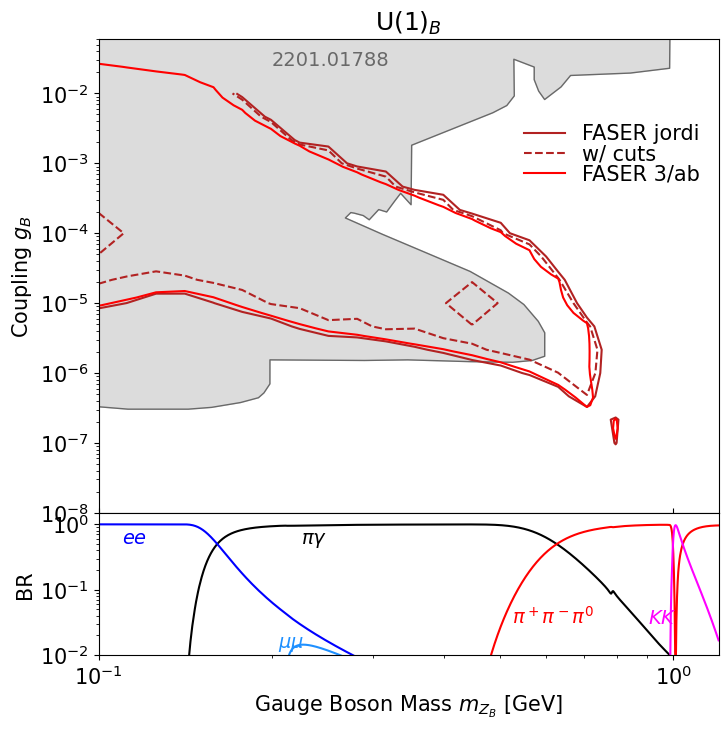

In [25]:
plot, ax, ax2 = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    projections=[],
    title=r"U(1)$_{B}$", 
    xlims = [0.1,1.2], 
    ylims=[10**-8,0.06],
    xlabel=r"Gauge Boson Mass $m_{Z_{B}}$ [GeV]", 
    ylabel=r"Coupling $g_{B}$",
    legendloc=(1,0.86),
    branchings=branchings,
    figsize=(8,8),
)

plot.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[-1.12040519e+00 -1.17698074e+00 -1.14803976e+00 -1.29067926e+00
  -1.21436361e+00 -1.18261395e+00 -1.26678252e+00 -1.33660785e+00
  -1.18102256e+00 -1.27600138e+00 -1.21580091e+00 -1.22845105e+00
  -1.25848572e+00 -1.25355209e+00 -1.17770012e+00 -1.53655431e+00
  -1.78400192e+00 -2.08010103e+00 -2.38017156e+00 -2.81878279e+00
  -3.47189414e+00]
 [-1.09568352e+00 -1.15515262e+00 -1.10613168e+00 -1.35803085e+00
  -1.27319435e+00 -1.20677044e+00 -1.26674057e+00 -1.34223968e+00
  -1.19048035e+00 -1.25554811e+00 -1.21583345e+00 -1.19787721e+00
  -1.26391676e+00 -1.21211582e+00 -1.28286044e+00 -1.55960193e+00
  -1.82755460e+00 -2.07659943e+00 -2.26416777e+00 -2.83243709e+00
  -3.46897183e+00]
 [-1.10551756e+00 -1.10814424e+00 -1.09085685e+00 -1.29067229e+00
  -1.30997064e+00 -1.20176560e+00 -1.19258521e+00 -1.26652328e+00
  -1.21979693e+00 -1.22578035e+00 -1.19226241e+00 -1.20784950e+00
  -1.24796043e+00 -1.30361790e+00 -1.25500846e+00 -1.44229713e+00
  -1.74187203e+00 -2.06774783e+00 -1.1

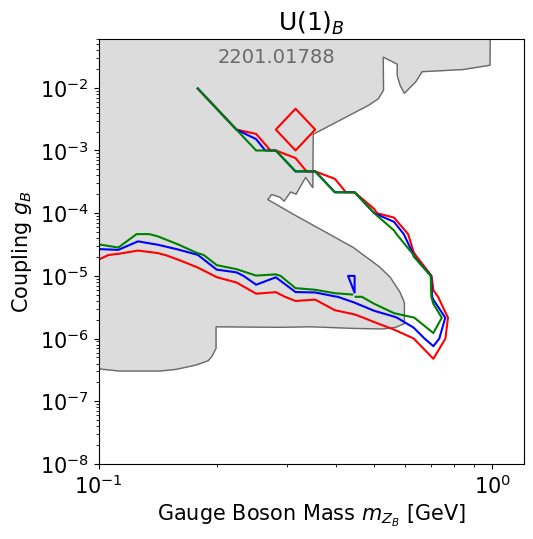

In [29]:
# calculating contour using significance values
z_level = 1.645
bkg_events = 24
bkg_frac_unc = 0.3
setups_jordi = [
    #["14TeV_default.npy",    "Jordi"  , "red",     "solid", 0., 100],
    #["14TeV_default_nominal.npy",    "Nominal"  , "blue",     "solid", 0., 3, bkg_events, bkg_frac_unc, z_level ]
    ["U1B_cutyields.npy",    "Nominal"  , "red",     "solid", 0., 3, 0., 0.001, z_level ],
    ["U1B_cutyields.npy",    "Nominal"  , "blue",     "solid", 0., 3, bkg_events, bkg_frac_unc, z_level ],
    ["U1B_cutyields.npy",    "Nominal"  , "green",     "solid", 0., 3, bkg_events, 0.99, z_level ]

]
my_plot = foresee.plot_reach_FASER(
    setups=setups_jordi,
    bounds=bounds,
    projections=[],
    title=r"U(1)$_{B}$", 
    xlims = [0.1,1.2], 
    ylims=[10**-8,0.06],
    xlabel=r"Gauge Boson Mass $m_{Z_{B}}$ [GeV]", 
    ylabel=r"Coupling $g_{B}$",
    legendloc=(1,0.86),
    #branchings=branchings,
    figsize=(5,5),
)

plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
plot.savefig("/Users/jordi/Downloads/U1B.pdf")
my_plot.show()